# Big Data Processes Exercises - Week 07

## <font color = pink>Data cleaning  & Exploratory Data Analysis</font>

#### What we will cover today:

1. Importing packages and libraries
2. Loading and examining the dataset
3. Exploratory Data Analysis
4. Removing unnecessary columns
5. Data cleaning
6. Pearson
    1. Heatmap
7. Distribution and Visualisations
8. Outliers
9. Features with biggest impact

***
***
***

## 1. Importing various libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import asarray

***
***
## 2. Loading the dataset

We will be working with the IBM-Employee-Attrition dataset yet again. However this time, **<font color=Orchid>we will be working with the <i>'raw'</i>, original dataset </font>** - Straight Outta Kaggle.

In the raw dataset, 'Attrition' is actually 'Yes' and 'No' and not '1' and '0'. During this Notebook you will learn how to change such instances into numerical data.

In [4]:
df = pd.read_csv("IBM.csv", delimiter = ",")
df_attrition = pd.read_csv("IBM-Employee-Attrition.csv", delimiter=",")

In [3]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [5]:
df_attrition

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2        

In [8]:
comparison_result = df.compare(df_attrition)
# comparison_result.dropna(axis=0, inplace=True)
comparison_result

Age       Attrition       YearsWithCurrManager      
     self other      self other                 self other
0     NaN   NaN       Yes     1                  NaN   NaN
1     NaN   NaN        No     0                  NaN   NaN
2     NaN   NaN       Yes     1                  NaN   NaN
3     NaN   NaN        No     0                  NaN   NaN
4     NaN   NaN        No     0                  NaN   NaN
...   ...   ...       ...   ...                  ...   ...
1465  NaN   NaN        No     0                  NaN   NaN
1466  NaN   NaN        No     0                  NaN   NaN
1467  NaN   NaN        No     0                  NaN   NaN
1468  NaN   NaN        No     0                  NaN   NaN
1469  NaN   NaN        No     0                  NaN   NaN

[1470 rows x 6 columns]

In [9]:
# Assuming you have a DataFrame called 'df' and a column called 'column_name'
df_type = df['Attrition'].dtype
df_att_type = df_attrition['Attrition'].dtype
print(df_type)
print(df_att_type)

object
int64


### **<font color= turquoise>EXERCISE 1</font>**
Examine the dataset throughly. What are some other differences between this 'raw' dataset and the cleaned IBM-dataset, we have worked with so far? For easier comparison, load the other IBM-Employee-Attrition dataset into the Notebook.

<div style="width: 100%; height: 1px; background-color: white;">
    <p style="color: black; text-align: center"><b>ANSWER</b></p>
</div>

**Write your answer here:**

The difference is the attrition column, which is of type object and the other
is of type int64.

<div style="width: 100%; height: 1px; background-color: white;"></div>

***
***
## 3. Exploratory Data Analysis

We will be working with the 'Attrition' column - our target variable. We want to figure out whether an employee has Attrition or not, i.e., whether the employee left the company or not.

Since we will be working with the 'Attrition' feature, let's start by moving it to the front column in the dataset for better visability.

*If you want more information about the columns and the values behind the columns, we refer to the Kaggle page from which this dataset is from https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data and https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/discussion/139552*

In [10]:
# We copy the column, drop (i.e., delete) it from our dataframe and insert it to the front
front = df['Attrition']
df.drop(labels = ['Attrition'], axis=1, inplace=True)
df.insert(0, 'Attrition', front)

#displaying quick overview for the dataset
df.head()

Attrition  Age     BusinessTravel  DailyRate              Department  \
0       Yes   41      Travel_Rarely       1102                   Sales   
1        No   49  Travel_Frequently        279  Research & Development   
2       Yes   37      Travel_Rarely       1373  Research & Development   
3        No   33  Travel_Frequently       1392  Research & Development   
4        No   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]


Below are examples of bits of code that you can use for initial exploration/getting an overview of the dataset.

In [11]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.965986   802.485714          9.192517     2.912925            1.0   
std       9.282287   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max     100.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.140136  
std                   3.222430              3.607829  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             25.000000  

[8 rows x 26 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
# Checking all unique values
df.nunique()

Attrition                      2
Age                           44
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

***
***

## 4. Removing unnecessary columns (features)

Above, we called the nunique() method. As you can see from the output, some columns have few unique values. For instance, 'Attrition' has only two different values ('Yes'  and 'No'). 'EducationField' on the other hand, has five unique values ('Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources'). Finally, 'EmployeeNNumber' has 1470 unique values. This is because each employee has their unique employeee number and the dataset has information on 1470 different employees.

As you can see from the examples above, the number of unique values vary from column to column. When a column (feature) has many unique and distinct values, it is deemed to have **high cardinality.** 

- High cardinality is when a feature has many values. A boolean column, which only can have the values of <font color=pink> true or false </font>, has a cardinality of 2. HTTP status codes – <font color=pink> 200, 301, 302, 404, 500 </font> – might have a cardinality under a few dozen. But, for an online shopping system, fields like <font color=pink> userId, shoppingCartId, and orderId </font> are often high-cardinality columns that can take take hundreds of thousands of distinct values. 
A large number of distinct values, tend to provide more detail for observation. On the other hand, attributes with low cardinality, having only a few distinct values, may limit .the level of insight that can be obtained. However, it is safe to say, that *very* high cardinality does not provide us with better insight or give our model a pattern for it's prediction.

Selecting a column and using .unique() method gives us unique values within that variable:

In [15]:
df['Attrition'].unique() # cardinality of 2

array(['Yes', 'No'], dtype=object)

In [16]:
df['EducationField'].unique() # cardinality of 6

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [17]:
df['EmployeeNumber'].unique() # cardinality of 1470 as every employee has their own number (N.B.: some numbers, like 3, are missing from the dataset)

array([   1,    2,    4, ..., 2064, 2065, 2068])

### 4.1 Features with high/low cardinality

Let us take a closer look at some of the the columns with a suspiciously high or low number of unique values. The reason we want to look at these is, that it is important to somehow deal with the features with high cardinality - either by transforming the values or completely deleting the column. 

OBS! Remember to write that in your reports as to why you're deleting and/or transforming your data, as a simple action as that can introduce bias in your model! 

In [18]:
df['EmployeeCount'].unique() # this column has only one value: '1'

array([1])

In [19]:
df['MonthlyRate'].unique() # this column has a lot of different values

array([19479, 24907,  2396, ...,  5174, 13243, 10228])

In [20]:
df['Over18'].unique() # this column too has only one value: 'Y'

array(['Y'], dtype=object)

In [21]:
df['StandardHours'].unique() # this column too has only one value: '80'

array([80])

**EmployeeCount, Over18, and StandardHours** contain only one unique value. 


- **EmployeeCount:** We cannot find more information about the column EmployeeCount on Kaggle - we can only assume it describes the number of employees represented in a given observation, which won't add anything to our prediction, since it is the same value ('1') across all observations.
- **Over18:** Every value in this column is 'Y', meaning the employee is over 18 years of age. This won't add to our prediction of Attrition either.
- **StandardHours:** Every value in this column is '80'. The unit here is unclear and no more information on Kaggle is provided.

Since all of the abovementioned values are the same, we can confidently remove the columns, as they will be useless in helping us predicting our target.

**EmployeeNumber** is a somewhat different story:

- **EmployeeNumber:** As described, this column holds the personal number of the given employee. It is probably some kind of ID. This column won't help us predict attrition, since it only contains "a number describing a person". In other words, there is no pattern that will emerge from this column that will help us predict attrition. 

Remember! This is our own assumption! Remember to note and write down everything you do with the dataset and why in your project reports!

Also! <font color=pink> *If you want to double-check which columns can be dropped, create a pearson correlation matrix! Columns with 'NaN' are a good indicator that they can be dropped. Hint hint: Notebook 3 BDP_Classification.ipynb. However! This does not apply to columns like 'EmployeeNumber' since it contains multiple unique values and not a single value*

In [22]:
# deleting the columns 'EmployeeNumber', 'EmployeeCount', 'Over18' and 'StandardHours' and saving the result in our variable 'df'
df = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'],  axis=1)

In [23]:
# checking that the columns has indeed been deleted

df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

***
***
## 5. Data Cleaning


### 5.1 Handling nominal/categorical data

A lot of the features/columns in the IBM dataset contain nominal/categorical data (if you are confused by the terms 'nominal', 'ordinal' etc., take a look in this week's text 'Exploratory Data Analysis' by Victoria Cox). 

To use nominal data for modeling, we need to transform it to numerical data, more on how to do this in a minute (or take a look here: https://towardsdatascience.com/handling-categorical-data-the-right-way-9d1279956fc6). 

First, let's look at the different types of nominal data.

Nominal data can be:
- *non-ordinal*, i.e. categories that are *not* ordered. In other words, the catgories have no natural, internal ordering. An example is a variable such as 'EducationField' which holds the following categories: 'Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources'
- *ordinal*, i.e. categories that have a natural order. An example *could* be a variable such as 'Education'. Here bachelor is below master which is below phd. However, be aware that this is *our* assumption. In your projects, you should explain the reasons for deciding that a nominal variable contains ordinality. You should also explain your choice of encoding, i.e., why you have chosen to handle the nominal variables in your dataset in the way you have.

When we handle nominal/categorical data, we need to assess whether the data is non-ordinal or ordinal, because these two types of data should often be handeled differently. 

**Binary, nominal data** which hold only two categories (i.e., the binary variables) can be handled using something called dummy coding. Dummy variables are variables that are either 0 or 1. Dummy coding entails assigning one variable the value '0' and the other one value '1'. Often, 0 signifies false/no/none while 1 signifies true/yes. For example, if we wanted to dummy code the nominal variable 'car type' (containing the two categories 'conventional car' and 'electric car'), we could create a column called 'Electric'. We would then set the variable to '0' for cars running on gas and '1' for cars running on electricity.

In the IBM dataset we have two variables, which can be dummy coded in this way:
- 'Attrition': 'Yes', 'No'
- 'Gender': 'Male', 'Female'

**Non-ordinal, nominal data** data which hold three or more categories can be handled with *one-hot encoding*. Here, one new binary variable is added for each category in the variable. In other words, one-hot encoding creates one binary variable for each category.

Examples of non-ordinal, nominal data in the IBM dataset is:
- 'EducationField', 'JobRole', 'MaritalStatus'

**One-hot encoding, visualized:**
<br>
![title](one-hot.png)

**Ordinal nominal data** can, in some cases, be replaced by numbers, which signify the natural ordering. For this, the .replace() method can be used.

In the IBM dataset, much of the ordinal categories have already been converted into numbers (see the dataset documentation on Kaggle to figure out what the original categories were: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data):
- 'Education'
- 'JobInvolvement'
- 'JobLevel'
- 'JobSatisfaction'
- 'RelationshipSatisfaction'
- 'WorkLifeBalance'
- 'PerformanceRating'

However, be aware that one need to be careful when replacing categories with numbers. When replacing categories with numbers, we assume a meaningful, sequential ordering of the categories. Moreover, we also assume that the categories are 'evenly spaced'. And, any models we train on this data, will assume this as well.

If we look at a variable such as 'Education', which consists of 'bachelor', 'master' and 'phd', these categories are not 'evenly spaced'. A bachelor is usually 3 years (4 in the US), a master is 2 years and a phd 3 years (4 in the us). Thus, the encoding made in the current data (bachelor = 1, master = 2, phd = 3) makes some 'wrong' assumptions, such as: master ('2') is the double of a bachelor ('1') and phd ('3') is three times a bachelor. This might be a problem when training your model. 

Another, more meaninful, way of encoding the 'Education' variable, could be to code the years of education:
- bachelor = '4', signifying that the degree takes 4 years of education (as the data is from the US)
- master = '6', signifying that the degree takes 6 years of education (4 from the bachelor + 2 from the master)
- phd = '10', signifying that the degree takes 10 years of education (4 from the bachelor + 2 from the master + 4 from the phd)

Thus, we can critisize the people who encoded the IBM dataset variable 'Education' and argue that they should either code it based om years spent on education OR one-hot encode it instead.

We highlight this, because you will need to make this type of decisions when handling the nominal/categorical data in your own dataset. We encourage you to experiment with your nominal encoding and see how it affects the models you train.

Below, we use .replace() to handle 'Attrition', 'Gender' and 'BusinessTravel'.

Next, we handle 'EducationField', 'JobRole', 'MaritalStatus' using one-hot encoding (usig the method .get_dummies()).



In [24]:
df.replace({"Attrition" : {"No": 0, "Yes" : 1}}, inplace=True)
df.replace({"Gender" : {"Female": 0, "Male" : 1}}, inplace=True)
df.replace({"OverTime" : {"No": 0, "Yes" : 1}}, inplace=True)
df.replace({"BusinessTravel" : {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently" : 2}}, inplace=True)

In [25]:
df = pd.get_dummies(df, columns = ["EducationField", "Department", "JobRole", "MaritalStatus"], dtype='int') 

df

Attrition  Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0             1   41               1       1102                 1          2   
1             0   49               2        279                 8          1   
2             1   37               1       1373                 2          2   
3             0   33               2       1392                 3          4   
4             0   27               1        591                 2          1   
...         ...  ...             ...        ...               ...        ...   
1465          0   36               2        884                23          2   
1466          0   39               1        613                 6          1   
1467          0   27               1        155                 4          3   
1468          0   49               2       1023                 2          3   
1469          0   34               1        628                 8          3   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  ...  \
0                           2       0          94               3  ...   
1                           3       1          61               2  ...   
2                           4       1          92               2  ...   
3                           4       0          56               3  ...   
4                           1       1          40               3  ...   
...                       ...     ...         ...             ...  ...   
1465                        3       1          41               4  ...   
1466                        4       1          42               2  ...   
1467                        2       1          87               4  ...   
1468                        4       1          63               2  ...   
1469                        2       1          82               4  ...   

      JobRole_Laboratory Technician  JobRole_Manager  \
0                                 0                0   
1                                 0                0   
2                                 1                0   
3                                 0                0   
4                                 1                0   
...                             ...              ...   
1465                              1                0   
1466                              0                0   
1467                              0                0   
1468                              0                0   
1469                              1                0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
1465                               0                          0   
1466                               0                          0   
1467                               1                          0   
1468                               0                          0   
1469                               0                          0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                              0                        1   
1                              1                        0   
2                              0                        0   
3                              1                        0   
4                              0                        0   
...                          ...                      ...   
1465                           0                        0   
1466                           0                        0   
1467                           0                        0   
1468                           0                        1   
1469   

In [26]:
# Check which columns our dataset currently holds (after we handled the nominal variables)
df.columns
#df.shape

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufact

Now, we want to take a look at the dataset, post encoding:

In [27]:
# To see all columns, we first ask Pandas to display all columns:
pd.set_option('display.max_columns', None)   

# Next, we take a look at the transformed dataset
df


Attrition  Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0             1   41               1       1102                 1          2   
1             0   49               2        279                 8          1   
2             1   37               1       1373                 2          2   
3             0   33               2       1392                 3          4   
4             0   27               1        591                 2          1   
...         ...  ...             ...        ...               ...        ...   
1465          0   36               2        884                23          2   
1466          0   39               1        613                 6          1   
1467          0   27               1        155                 4          3   
1468          0   49               2       1023                 2          3   
1469          0   34               1        628                 8          3   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           2       0          94               3         2   
1                           3       1          61               2         2   
2                           4       1          92               2         1   
3                           4       0          56               3         1   
4                           1       1          40               3         1   
...                       ...     ...         ...             ...       ...   
1465                        3       1          41               4         2   
1466                        4       1          42               2         3   
1467                        2       1          87               4         2   
1468                        4       1          63               2         2   
1469                        2       1          82               4         2   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                   4           5993        19479                   8   
1                   2           5130        24907                   1   
2                   3           2090         2396                   6   
3                   3           2909        23159                   1   
4                   2           3468        16632                   9   
...               ...            ...          ...                 ...   
1465                4           2571        12290                   4   
1466                1           9991        21457                   4   
1467                2           6142         5174                   1   
1468                2           5390        13243                   2   
1469                3           4404        10228                   2   

      OverTime  PercentSalaryHike  PerformanceRating  \
0            1                 11                  3   
1            0                 23                  4   
2            1                 15                  3   
3            1                 11                  3   
4            0                 12                  3   
...        ...                ...                ...   
1465         0                 17                  3   
1466         0                 15                  3   
1467         1                 20                  4   
1468         0                 14                  3   
1469         0                 12                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
1465                         3                 1 

As you can se, we have now succesfully transformed the columns with nominal data.
The columns now all contain numbers. We can confirm this by calling .dtypes. As the output shows, all columns now contain integer values:

In [28]:
df.dtypes

Attrition                            int64
Age                                  int64
BusinessTravel                       int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
Gender                               int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtComp

### 5.2 Handling missing values

Besides from handling nominal values, data cleaning also consists of finding and handling missing values. For more on how to do this, take a lok at the notebook from week 2.


***
***
## 6. Pearson

A little recap from week 3 - BDP_Classification.ipynb.

In order to build any model we must specify a **target variable/dependent variable** and one or more **feature variables/independent variables**.

- **(X)** = feature or independent variable
- **(y)** = target or dependent variable - in this case, 'Attrition'

In order to figure out what variables to choose as feature(s), aka, which variables we will use to try to predict our target, we create a **correlation matrix**. 

The correlation matrix we will create visualizes the **pearson correlation** between the variables in the dataset. Other correlation methods include: 
- Spearman 
- Kendall 
- Gamma 
- Eta 
- **You can look up the different correlation types and how they differ on the internet**

In [29]:
# `corr`: The computed correlation matrix
# Method = pearson
# Numeric values only. A correlation cannot take into account qualitative data unless they are transformed, which we just did above!
corr = df.corr(method='pearson', numeric_only=True)
corr

Attrition       Age  BusinessTravel  \
Attrition                           1.000000 -0.158678        0.127006   
Age                                -0.158678  1.000000       -0.003815   
BusinessTravel                      0.127006 -0.003815        1.000000   
DailyRate                          -0.056652  0.011456       -0.015539   
DistanceFromHome                    0.077924 -0.001207       -0.009696   
Education                          -0.031373  0.209567       -0.008670   
EnvironmentSatisfaction            -0.103369  0.011143       -0.011310   
Gender                              0.029453 -0.032025       -0.044896   
HourlyRate                         -0.006846  0.025045       -0.004164   
JobInvolvement                     -0.130016  0.031074        0.029300   
JobLevel                           -0.169105  0.501276       -0.011696   
JobSatisfaction                    -0.103481 -0.003695        0.008666   
MonthlyIncome                      -0.159840  0.489563       -0.013450   
MonthlyRate                         0.015170  0.027927       -0.008440   
NumCompaniesWorked                  0.043494  0.295451       -0.030743   
OverTime                            0.246118  0.024763        0.042752   
PercentSalaryHike                  -0.013478 -0.001654       -0.025727   
PerformanceRating                   0.002889 -0.000064        0.001683   
RelationshipSatisfaction           -0.045872  0.053898        0.008926   
StockOptionLevel                   -0.137145  0.032680       -0.028257   
TotalWorkingYears                  -0.171063  0.668864        0.007972   
TrainingTimesLastYear              -0.059478 -0.022129        0.016357   
WorkLifeBalance                    -0.063939 -0.019613        0.004209   
YearsAtCompany                     -0.134392  0.305633        0.005212   
YearsInCurrentRole                 -0.160545  0.207989       -0.005336   
YearsSinceLastPromotion            -0.033019  0.211411        0.005222   
YearsWithCurrManager               -0.143725  0.190994       -0.000992   
EducationField_Human Resources      0.036466  0.034898       -0.003168   
EducationField_Life Sciences       -0.032703  0.012751        0.019860   
EducationField_Marketing            0.055781  0.035975        0.005201   
EducationField_Medical             -0.046999 -0.009341       -0.011245   
EducationField_Other               -0.017898 -0.041914       -0.000470   
EducationField_Technical Degree     0.069355 -0.028595       -0.019699   
Department_Human Resources          0.016832  0.041679       -0.002796   
Department_Research & Development  -0.085293  0.011354        0.005308   
Department_Sales                    0.080855 -0.030112       -0.004261   
JobRole_Healthcare Representative  -0.078696  0.095839       -0.001426   
JobRole_Human Resources             0.036215 -0.005648        0.010435   
JobRole_Laboratory Technician       0.098290 -0.143011        0.002094   
JobRole_Manager                    -0.083316  0.288349       -0.039312   
JobRole_Manufacturing Director     -0.082994  0.047436        0.014893   
JobRole_Research Director          -0.088870  0.181858       -0.005138   
JobRole_Research Scientist         -0.000360 -0.146462        0.002477   
JobRole_Sales Executive             0.019774 -0.004396       -0.025131   
JobRole_Sales Representative        0.157234 -0.174115        0.059995   
MaritalStatus_Divorced             -0.087716  0.030165       -0.028444   
MaritalStatus_Married              -0.090984  0.087537        0.002198   
MaritalStatus_Single                0.175419 -0.120415        0.023017   

                                   DailyRate  DistanceFromHome  Education  \
Attrition                          -0.056652          0.077924  -0.031373   
Age                                 0.011456         -0.001207   0.209567   
BusinessTravel                     -0.015539         -0.009696  -0.008670   
DailyRate                           1.000000         -0.004985  -0.016806   
DistanceFromHome       

### 6.1 Heatmap

We have constructed a pearson correlation matrix, however for better readability we will create a **heatmap** based on our correlation matrix. A heatmap is basically a graphical representation of the data that uses color coding to represent different values. 


Here we use the library Seaborn which we defined as 'sns'.

**<font color=Orchid>REMEMBER: If you'd like to inspect the heatmap using zoom, hover your mouse over the plot and click on the middle button (the one looking like a small histogram) in the upper right corner.</font>**

<Axes: >

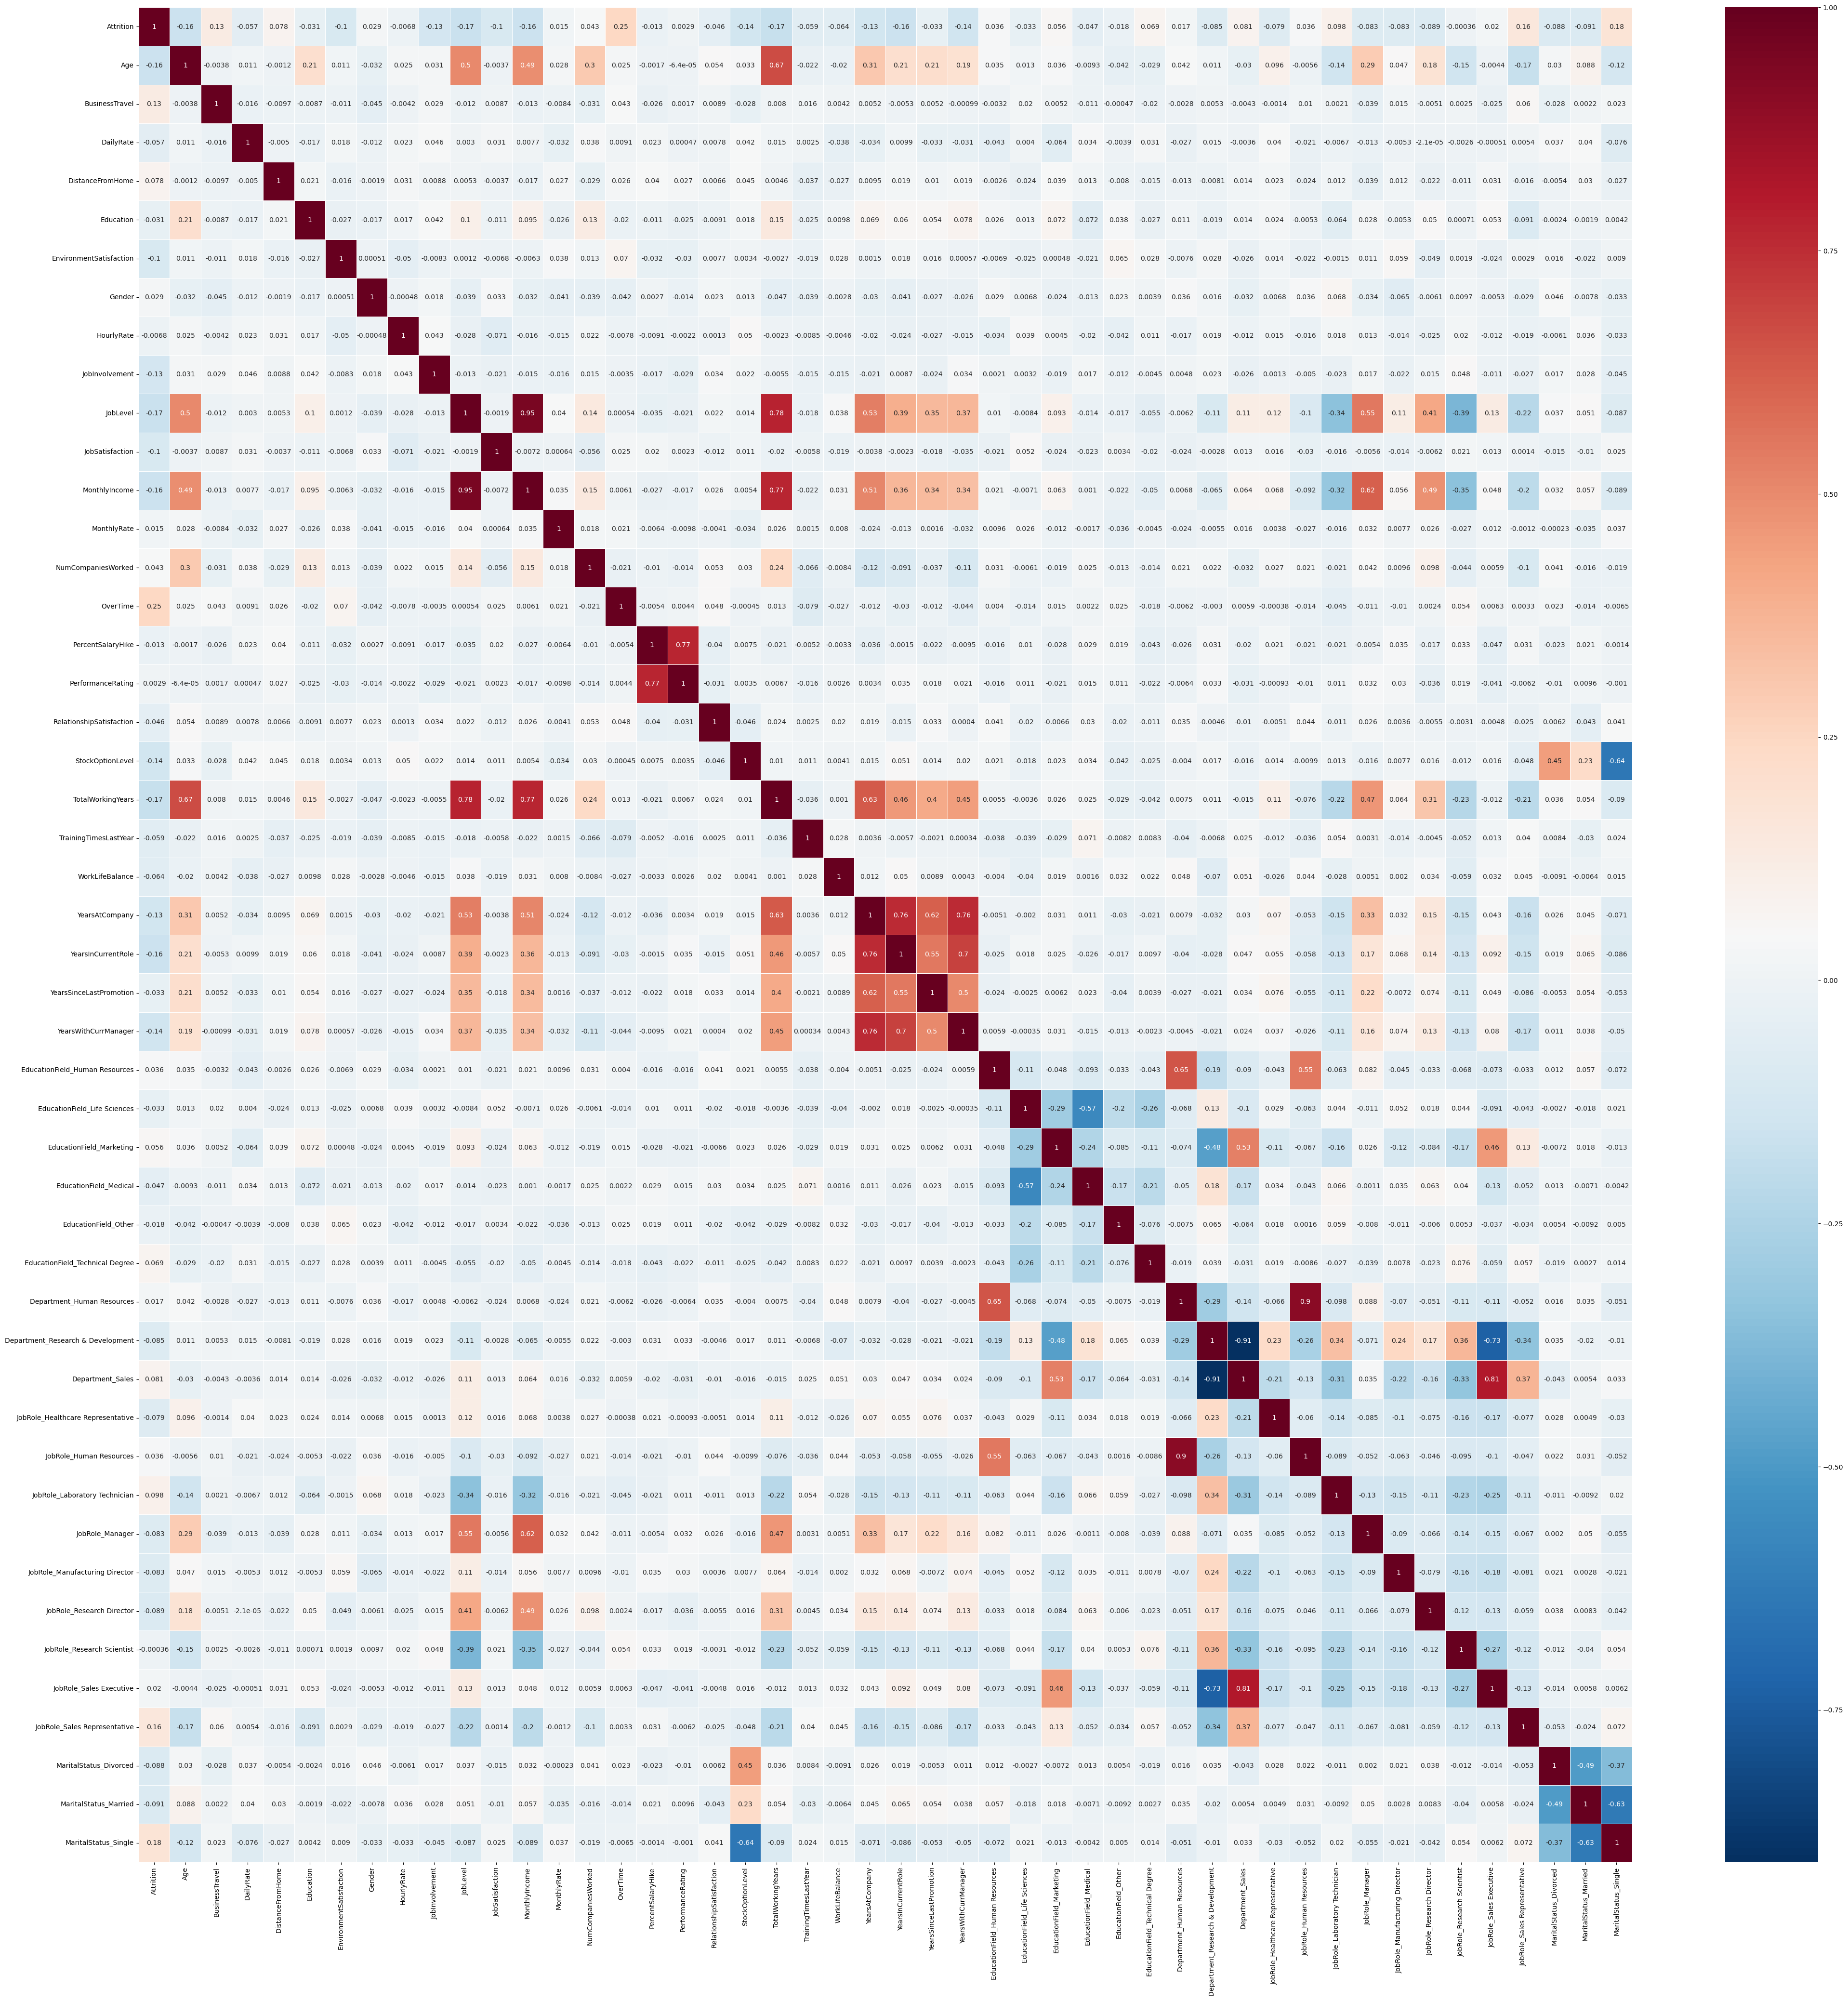

In [30]:
# We create a new figure (fig) and axis (ax) with a specified size.
fig, ax = plt.subplots(figsize=(50,50)) # Adjust the figsize values to change the size of each cell in the heatmap.

# - `xticklabels` & `yticklabels`: Use the columns of the correlation matrix for labeling the x and y axis respectively.
#   blue represents positive correlations and red represents negative correlations.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)

The Pearson correlation coefficient measures the linear relationship between two variables.
Its value ranges from -1 to 1, where:
- **1** implies a perfect **positive linear relationship**. If one variable increases, the other variable increases as well
- **-1** implies a perfect **negative linear relationship**. When one variable increases, the other variables decreases
- **0** implies **no relationship** between the variables
- The darker the colour, the more correlated the variables are

<font color=Orchid>OBS! Remember that correlation is not causation!</font>

### 6.2 Sorting the heatmap

Since we only want to focus on attrition, lets us sort our axes with their correlation with attrition.

<Axes: >

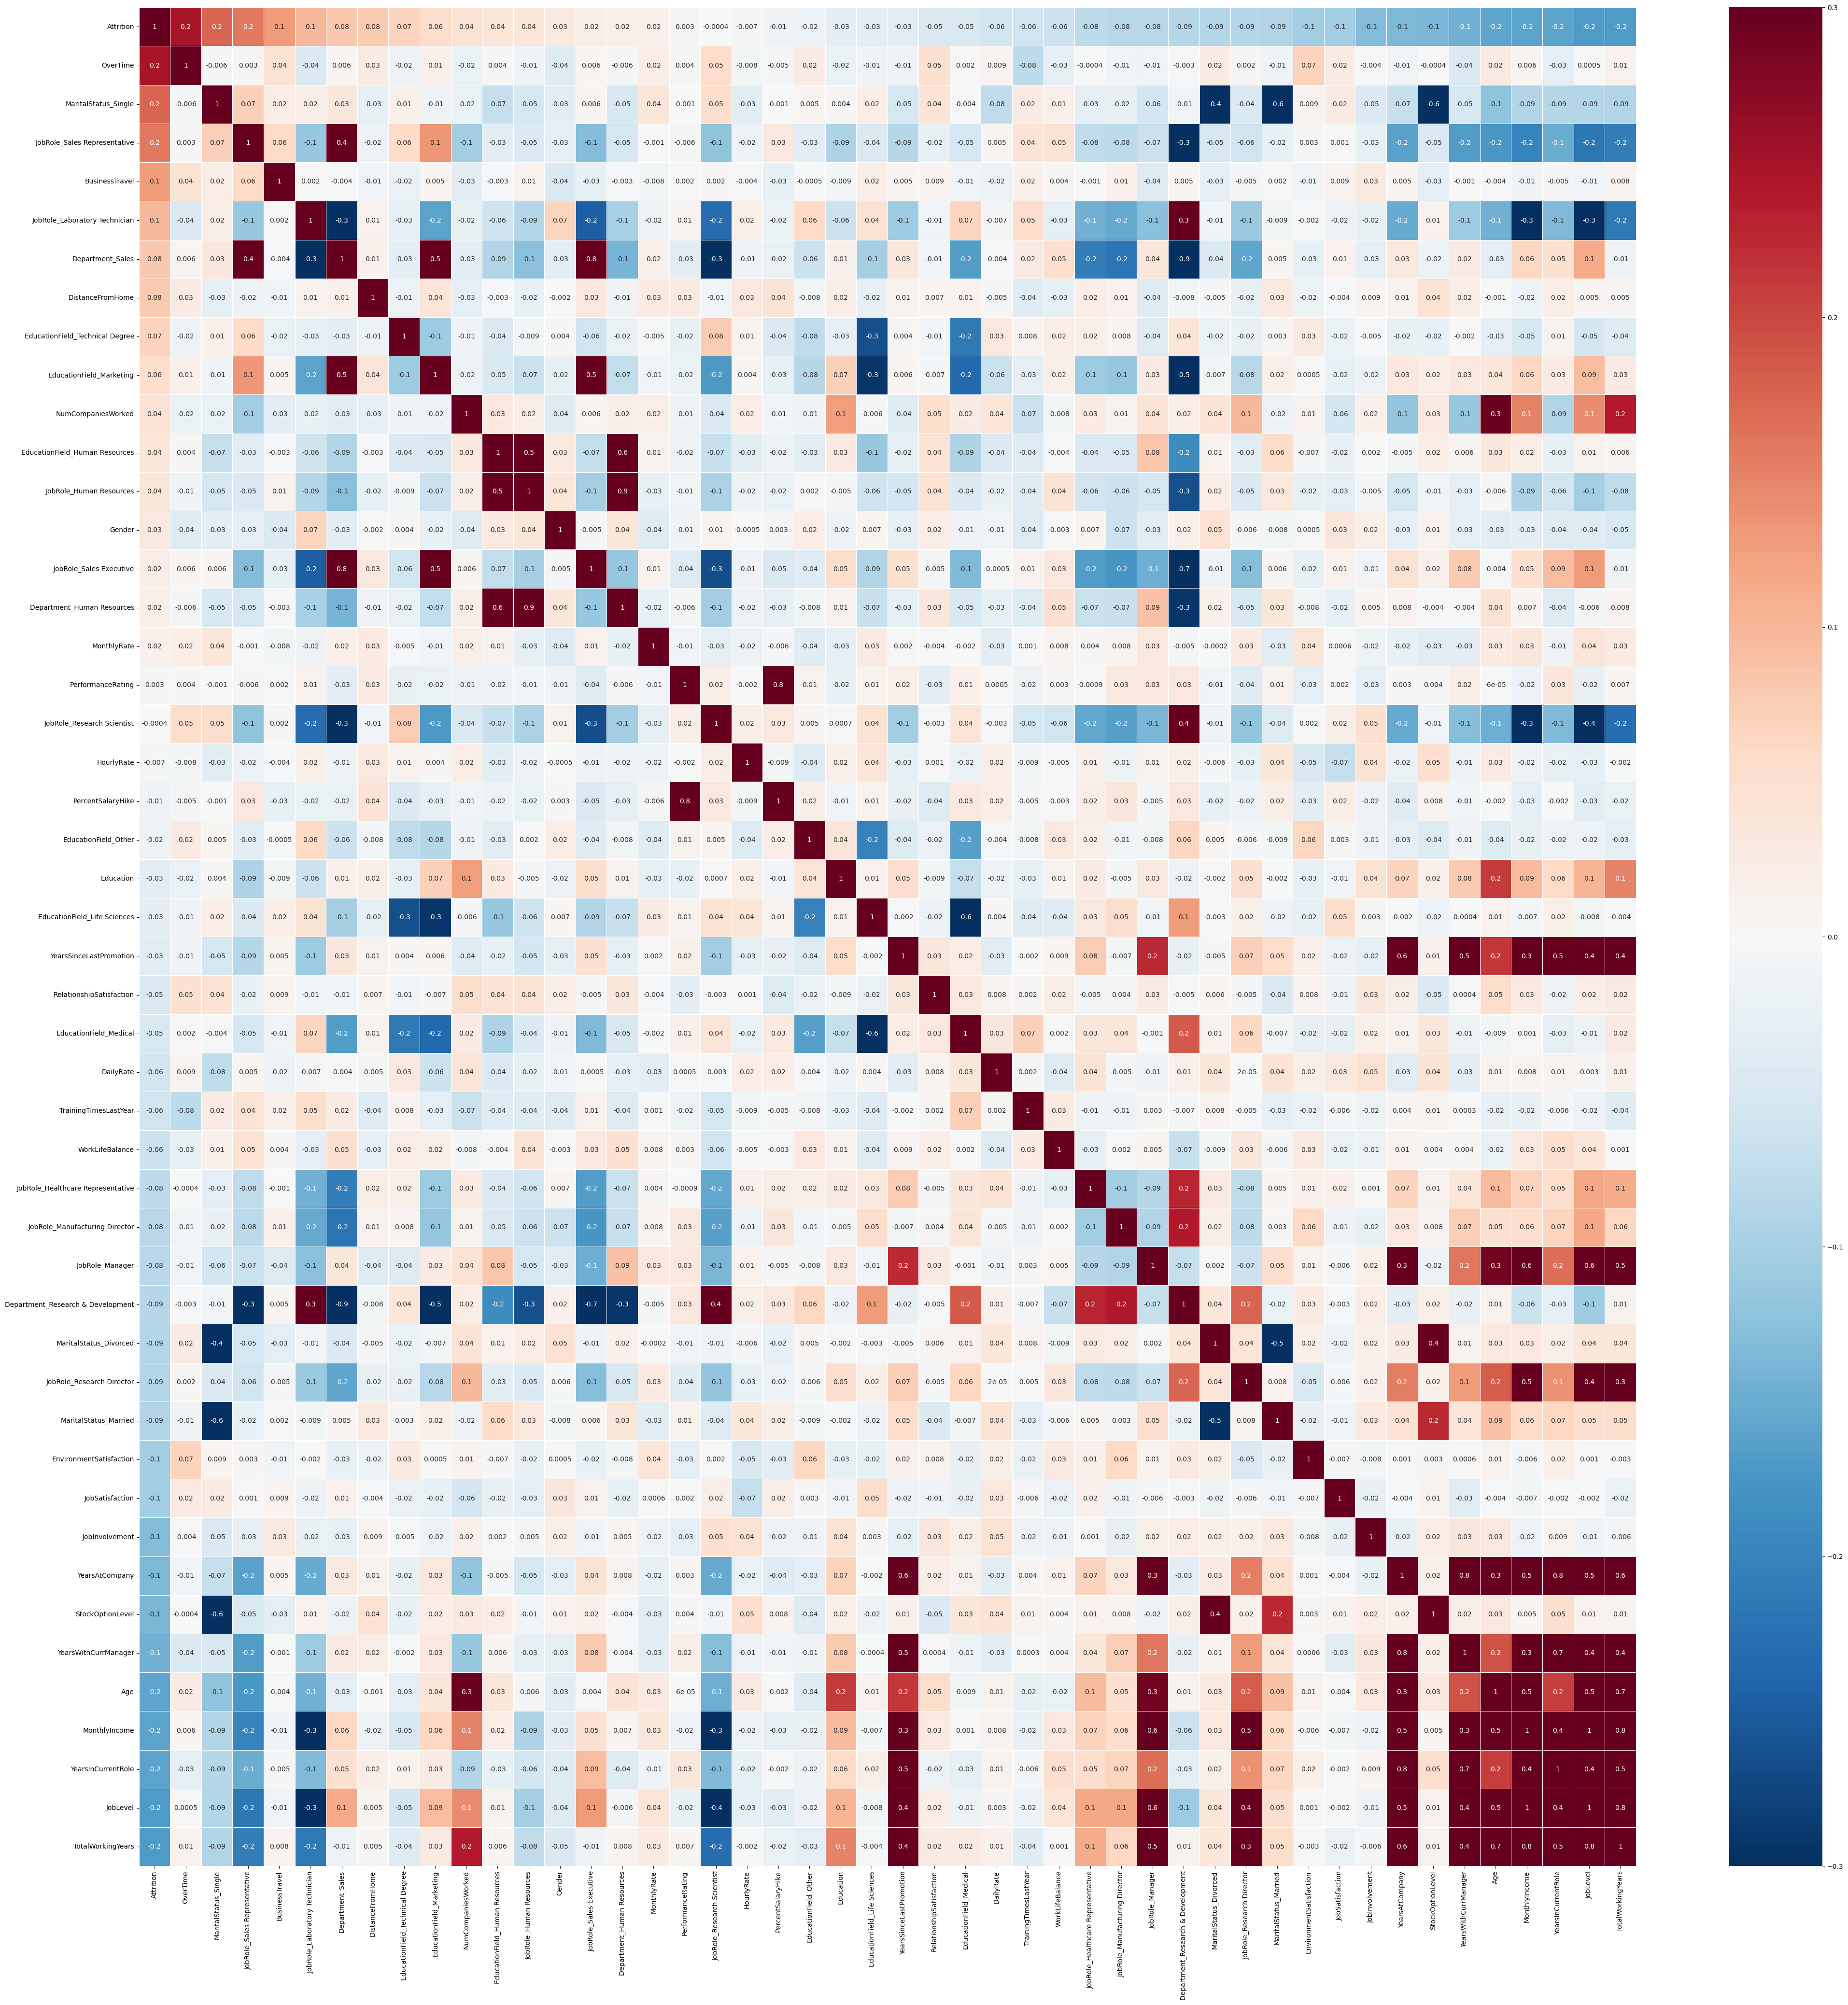

In [31]:
#Sorting the axes by thier correlation with attrition

col = df.corr().nlargest(48, "Attrition").Attrition.index
plt.figure(figsize=(50, 50))
sns.heatmap(df[col].corr(), vmin=-0.3, vmax=0.3, cmap='RdBu_r', annot=True, linewidth=0.5, annot_kws={"size":10}, fmt='.1g')


### **<font color= turquoise>EXERCISE 2</font>**

What can we conclude from this correlation matrix?
And how may the information in the matrix help us in our quest to predict attrition?

**Hints** 
- 'Attrition': 0 = no, the employee did not leave, 1 = yes the employee left
- Red signifies a positive correlation = attrition is positively correlated with the given feature
- Blue signifies a negative correlation = attrition is negatively correlated with the given feature
- The darker the color, the more strongly correlated the variables are 

<div style="width: 100%; height: 1px; background-color: white;">
    <p style="color: black; text-align: center"><b>ANSWER</b></p>
</div>

**Your explanations go here:**

This shows the variables that have the strongest relationship with e.g. Attrition.

Here, we can see that attrition and working overtime have a positive correlation.
So when working more overtime, employees are more prone to leaving the company.

On the other hand, the total working years have a somewhat negative relationship.
This means that employees that have been employed for many years are less prove
to leaving the company than new employees.

<div style="width: 100%; height: 1px; background-color: white;"></div>

***
***
## 7. Distribution & Visualisation

We will now look at the distribution within the different features and visualise them based on Victoria Cox's chapter. 

We will do through "basic visualisations" - but we urge you to do some research and find other types of plots and visualisations. Pairplots, barplots, boxplots, etc...

### 7.1 Age column

Below, we count the number of employees of different ages. For instance, we can see that there is 8 employees in the dataset, who are 18 years old.

In [32]:
# Cheap way to check consistency and distribution within a column
df.groupby(['Age']).Age.count()

Age
18      8
19      9
20     11
21     13
22     16
23     14
24     26
25     26
26     39
27     48
28     48
29     68
30     60
31     69
32     61
33     58
34     77
35     78
36     69
37     50
38     57
39     42
40     57
41     40
42     46
43     32
44     33
45     41
46     33
47     24
48     19
49     24
50     30
51     19
52     18
53     19
54     18
55     22
56     14
57      4
58     14
59     10
60      5
100     1
Name: Age, dtype: int64

Now, we visualize the age distribution:

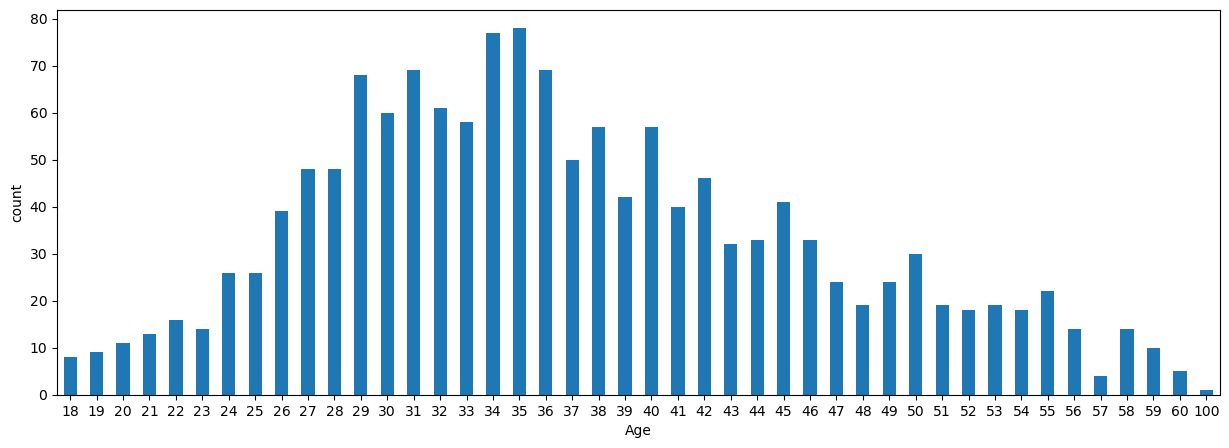

In [33]:
df['Age'].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count', figsize=(15,5))

plt.show()

# You can also write a for-loop to view all the distributions of the columns without writing out all the colum names
#for col in df:
#    df[col].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
#    plt.show()
#Only a requirement outside of Jupyter Notebook

Pay attention to any odd distribution - they can say a lot about the data quality, and *hint hint, missing values!*

### **<font color=turquoise>EXERCISE 3</font>**

Is there anything odd about the 'Age' distribution? What about other features? Any odd distributions there?

<div style="width: 100%; height: 1px; background-color: white;">
    <p style="color: black; text-align: center"><b>ANSWER</b></p>
</div>

**Write your answers here**

There is no employee over 60, which is plausible, but then there is a couple of
employees that are 100 years old. That is odd.

<div style="width: 100%; height: 1px; background-color: white;"></div>

### 7.2 Attrition Column

Now you know how to visualise and analyse the distribution of a features. It's also important to see the distribution of our target feature - Attrition.

*Little recap from Evaluation week - BDP_Evaluation.ipynb*

In [34]:
#To better see the number of 'Yes' and 'No' values
df.groupby(['Attrition']).Attrition.count()

Attrition
0    1233
1     237
Name: Attrition, dtype: int64

Now let's visualise the distribution of Attrition!

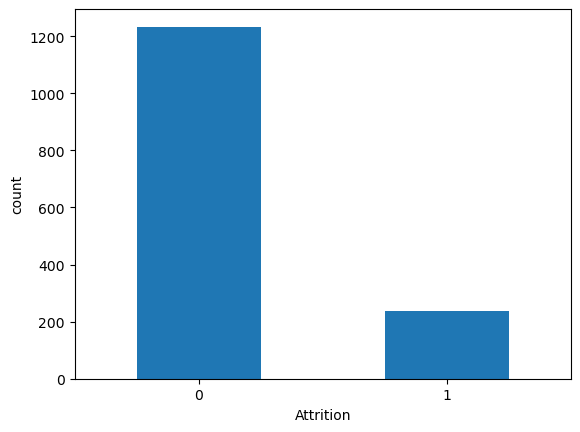

In [35]:
df['Attrition'].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()


We can see that 237 employees have somehow left the company. 

237 ÷ 1233 = 0.1922 = 19.22%

This means that we are working with an imbalanced dataset, and during our modelling phase, we have to have that in mind and take the imbalance into account i.e. when choosing a correct metric.

***
***

## 8. Outliers

Outliers (i.e., extreme values like '155' in an 'Age'-column) can be wrong values in a dataset. Either due to a typo, conversions, or just due to the context of the dataset.

One way to look for outliers, is to look at the min and max value of a given feature/column. Do they make sense in the context of the database and in our real world? Remember! These are assumptions! 



In [36]:
df.describe()

Attrition          Age  BusinessTravel    DailyRate  \
count  1470.000000  1470.000000     1470.000000  1470.000000   
mean      0.161224    36.965986        1.086395   802.485714   
std       0.367863     9.282287        0.532170   403.509100   
min       0.000000    18.000000        0.000000   102.000000   
25%       0.000000    30.000000        1.000000   465.000000   
50%       0.000000    36.000000        1.000000   802.000000   
75%       0.000000    43.000000        1.000000  1157.000000   
max       1.000000   100.000000        2.000000  1499.000000   

       DistanceFromHome    Education  EnvironmentSatisfaction       Gender  \
count       1470.000000  1470.000000              1470.000000  1470.000000   
mean           9.192517     2.912925                 2.721769     0.600000   
std            8.106864     1.024165                 1.093082     0.490065   
min            1.000000     1.000000                 1.000000     0.000000   
25%            2.000000     2.000000                 2.000000     0.000000   
50%            7.000000     3.000000                 3.000000     1.000000   
75%           14.000000     4.000000                 4.000000     1.000000   
max           29.000000     5.000000                 4.000000     1.000000   

        HourlyRate  JobInvolvement     JobLevel  JobSatisfaction  \
count  1470.000000     1470.000000  1470.000000      1470.000000   
mean     65.891156        2.729932     2.063946         2.728571   
std      20.329428        0.711561     1.106940         1.102846   
min      30.000000        1.000000     1.000000         1.000000   
25%      48.000000        2.000000     1.000000         2.000000   
50%      66.000000        3.000000     2.000000         3.000000   
75%      83.750000        3.000000     3.000000         4.000000   
max     100.000000        4.000000     5.000000         4.000000   

       MonthlyIncome   MonthlyRate  NumCompaniesWorked     OverTime  \
count    1470.000000   1470.000000         1470.000000  1470.000000   
mean     6502.931293  14313.103401            2.693197     0.282993   
std      4707.956783   7117.786044            2.498009     0.450606   
min      1009.000000   2094.000000            0.000000     0.000000   
25%      2911.000000   8047.000000            1.000000     0.000000   
50%      4919.000000  14235.500000            2.000000     0.000000   
75%      8379.000000  20461.500000            4.000000     1.000000   
max     19999.000000  26999.000000            9.000000     1.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        1470.000000        1470.000000               1470.000000   
mean           15.209524           3.153741                  2.712245   
std             3.659938           0.360824                  1.081209   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std       

### **<font color= turquoise>EXERCISE 4</font>**
Can you find the age outliers? Outliers can mess with the result of our model. A way to deal with them is to transform them - either by inserting another value or by removing them from the dataset entirely. 

*Hint hint!* Go back to the Notebook from week 02 - BDP_Basics, to see how to remove a spefic row.


<div style="width: 100%; height: 1px; background-color: white;">
    <p style="color: black; text-align: center"><b>ANSWER</b></p>
</div>

**Write your answer here:**

The person of age 100.

<div style="width: 100%; height: 1px; background-color: white;"></div>

In [37]:
# Count employees of age 100
count_age_100 = df[df['Age'] == 100].shape[0]
print(count_age_100)

1


In [38]:
# Remove that entry
df = df[df['Age'] != 100]
df = df.drop(df[df['Age'] == 100].index)

In [39]:
# Count again
count_age_100 = df[df['Age'] == 100].shape[0]
print(count_age_100)

0


### **<font color= turquoise>EXERCISE 5</font>**
What are the consequences of transforming an outlier or completely removing it? How does it affect modelling? Are there any ethical concerns doing this?


<div style="width: 100%; height: 1px; background-color: white;">
    <p style="color: black; text-align: center"><b>ANSWER</b></p>
</div>

**Write your answer here:**

- This will influence the statistical properties of the dataframe.
- We have a loss of information.
- It will have an impact on the model: choice of loss-function.

<div style="width: 100%; height: 1px; background-color: white;"></div>


***
***

## 9. Which variables have the biggest impact?

We know from our Pearson Correlation Matrix and Pearson Correlation Heatmap that some features are more strongly correlated to our target feature than others. Obs! Again, remember that correlation is not causation! We need to figure out which features actually have the most impact on 'Attrition', because it is these features that can help us better predict Attrition.

We will now create a histogram over the Pearson Correlation results.

<Axes: >

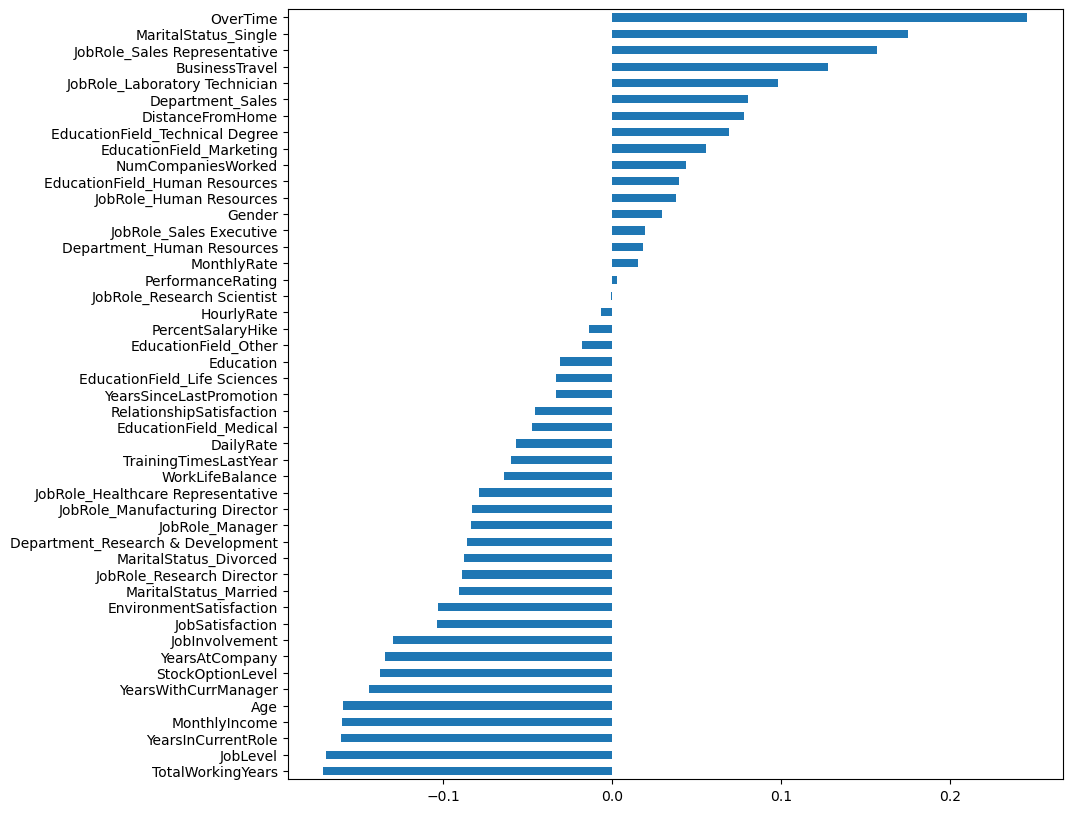

In [40]:
# We create a histogram, but we don't want Attrition there, since that is our target and it would just be correlated with it self.
df.drop('Attrition', axis=1).corrwith(df.Attrition).sort_values().plot(kind='barh', figsize=(10, 10))

All these variables have a correlation with attrition -- either positive or negative. The variables in the middle, not as much. Therefore, we can start by training a model on  cut the features that have the strongest correlation to attrition

### **<font color= turquoise>EXERCISE 6</font>**
Examine whether more or less features is better when training classification models using machine learning. 

This can be found out using Principal Component Analysis (PCA).

***
***
***

# Take home messages

After finishing this notebook, you should know how to:
- thoroughly examine a dataset
- encode values
- modify a Pearson Correlation heatmap
- visualise and analyse a distribution
- Find and handle outliers
- Decide on which features to use when predicting your target variable

## Time to explore and clean your own datasets!

## Good luck with your projects!
## - Your BDP TAs  ❤